# 10-13. 프로젝트 : 뉴스기사 요약해보기

새로운 데이터셋에 대해서 추상적 요약과 추출적 요약을 모두 해보는 시간을 가져봐요.

## Step 1. 데이터 수집하기

데이터는 아래 링크에 있는 뉴스 기사 데이터(news_summary_more.csv)를 사용하세요.

- sunnysai12345/News_Summary (https://github.com/sunnysai12345/News_Summary)

아래의 코드로 데이터를 다운로드할 수 있어요.

## Step 2. 데이터 전처리하기 (추상적 요약)

실습에서 사용된 전처리를 참고하여 각자 필요하다고 생각하는 전처리를 추가 사용하여 텍스트를 정규화 또는 정제해 보세요.

만약, 불용어 제거를 선택한다면 상대적으로 길이가 짧은 요약 데이터에 대해서도 불용어를 제거하는 것이 좋을지 고민해 보세요.

1) 중복 샘플과 NULL 값이 존재하는 샘플 제거
2) 텍스트 정규화와 불용어 제거

- 텍스트 정규화 : 같은 표현 통일 시키기 / 불용어 : 별도움이 되지 않음 단어

3) 멀티프로세싱으로 데이터 전처리

- 별도의 프로세스를 생성하여 병렬처리(소요시간 축소)

4) 훈련데이터와 테스트데이터 나누기

- 학습 진행을 위한 데이터크기 결정 및 문장 시작, 끝 표시

5) 시작 토큰과 종료 토큰 추가하기

6) 단어 집합(vocabulary) 만들기 및 정수 인코딩

- 단어 집합 만들기 : 훈련데이터 및 테스트 데이터의 각 단어 마다 고유한 정수를 맵핑하는 작업

7) 패딩하기

## Step 3. 어텐션 메커니즘 사용하기 (추상적 요약)

일반적인 seq2seq보다는 어텐션 메커니즘을 사용한 seq2seq를 사용하는 것이 더 나은 성능을 얻을 수 있어요. 실습 내용을 참고하여 어텐션 메커니즘을 사용한 seq2seq를 설계해 보세요.

1) 함수형 API를 이용해서 인코더를 설계
2) 디코더 설계
3) 어텐션 메커니즘
또 다른 신경망 생성

4) 모델 훈련하기
- EarlyStopping(조기종료) : 검증 데이터의 손실이 줄어들지 않고 증가하는 현상이 patience=2(2회) 관측되면 학습을 멈추도록 설정

5) 인퍼런스 모델 구현
6) 모델 테스트

## Step 4. 실제 결과와 요약문 비교하기 (추상적 요약)

원래의 요약문(headlines 열)과 학습을 통해 얻은 추상적 요약의 결과를 비교해 보세요.

## Step 5. Summa을 이용해서 추출적 요약해보기

추상적 요약은 추출적 요약과는 달리 문장의 표현력을 다양하게 가져갈 수 있지만, 추출적 요약에 비해서 난이도가 높아요. 반대로 말하면 추출적 요약은 추상적 요약에 비해 난이도가 낮고 기존 문장에서 문장을 꺼내오는 것이므로 잘못된 요약이 나올 가능성이 낮아요.

Summa의 summarize를 사용하여 추출적 요약을 해보세요.

1) 데이터 다운로드 하기
2) summarize 사용하기

In [ ]:
#데이터 준비하기

import nltk  # NLTK(Natural Language Toolkit) : 영어 기호, 통계, 자연어 처리를 위한 라이브러리
nltk.download('stopwords')

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request

print('=3')

Error: Kernel is dead

In [2]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98401


In [3]:
# 랜덤한 10개 샘플 출력
data.sample(10)

,headlines,text
54999,"Call it co-existence of films, not clash: 'Ked...",While talking about his film 'Kedarnath' which...
79402,"DRDO develops chicken biscuits, tulsi bars for...",The Defence Research and Development Organisat...
13320,"'Drunk', round pigeon named New Zealand bird o...","KererÃ Â«, a native green and bronze wood pige..."
21365,"PM Modi's I-Day speech fireworks of numbers, s...",An editorial in Shiv Sena's mouthpiece 'Saaman...
95671,Surgeons transplant arm-grown ear to man's hea...,A Chinese man who underwent a procedure to hav...
58984,Kerala 'love jihad' is most complex case I hav...,Chief Justice of India Dipak Misra has said th...
8030,Government body holds workshop on developing '...,The National Mission for Clean Ganga organised...
68741,Saudi Arabia allows women into sports stadium ...,Saudi Arabia has invited women to a sports sta...
74337,Boxer holds all possible world c'ships in 63.5...,American junior welterweight boxer Terence Cra...
70409,What are the features of iPhone X?,"Apple's latest smartphone iPhone X, which will..."


## Step 2. 데이터 전처리하기 (추상적 요약)

실습에서 사용된 전처리를 참고하여 각자 필요하다고 생각하는 전처리를 추가 사용하여 텍스트를 정규화 또는 정제해 보세요.

만약, 불용어 제거를 선택한다면 상대적으로 길이가 짧은 요약 데이터에 대해서도 불용어를 제거하는 것이 좋을지 고민해 보세요.

1) 중복 샘플과 NULL 값이 존재하는 샘플 제거

2) 텍스트 정규화와 불용어 제거
텍스트 정규화 : 같은 표현 통일 시키기 / 불용어 : 별도움이 되지 않음 단어

3) 멀티프로세싱으로 데이터 전처리
별도의 프로세스를 생성하여 병렬처리(소요시간 축소)

4) 훈련데이터와 테스트데이터 나누기

학습 진행을 위한 데이터크기 결정 및 문장 시작, 끝 표시

5) 시작 토큰과 종료 토큰 추가하기

6) 단어 집합(vocabulary) 만들기 및 정수 인코딩
단어 집합 만들기 : 훈련데이터 및 테스트 데이터의 각 단어 마다 고유한 정수를 맵핑하는 작업

7) 패딩하기

### 2-1. 중복 샘플과 NULL 값이 존재하는 샘플 제거

In [4]:
# 중복 샘플 유무 확인
print('headlines 열에서 중복을 배제한 유일한 샘플의 수 :', data['headlines'].nunique())

# 데이터 고유값들의 수를 ㄹ출력해주는 함수
print('text 열에서 중복을 배제한 유일한 샘플의 수 :', data['text'].nunique())

headlines 열에서 중복을 배제한 유일한 샘플의 수 : 98280
text 열에서 중복을 배제한 유일한 샘플의 수 : 98360


중복을 제외한다면, headlines 에는 98280개, text 에는 98,380개의 유니크한 데이터가 존재함을 확인할 수 있습니다.

In [5]:
# drop_duplicates()를 사용, 손쉽게 중복 샘플을 제거
# inplace=True 를 설정하면 DataFrame 타입 값을 return 하지 않고 data 내부를 직접적으로 바꿉니다.

data.drop_duplicates(subset = ['text'], inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98360


In [6]:
# 중복 제거후 .isnull().sum()으로 null값 유무 재확인 

print(data.isnull().sum())

headlines    0
text         0
dtype: int64


In [7]:
# 데이터 프레임에서 null 값을 제거 dropna() 함수 사용

data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98360


### 2-2. 텍스트 정규화와 불용어 제거

- 텍스트 정규화 : 같은 표현 통일 시키기 / 불용어 : 별도움이 되지 않음 단어

In [8]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


이제 정규화 준비까지 마쳤어요.

하지만 아직 끝난 게 아니에요. 일반적으로 텍스트에는 자주 등장하지만 자연어 처리를 할 때 실질적으로 별 도움이 되지 않는 단어들이 존재해요. 이를 불용어(stopwords)라고 불러요. 때로는 불용어를 제거하는 것이 자연어 처리의 성능을 높이는 방법일 수 있어요. 여기서는 NLTK에서 제공하는 불용어 리스트를 참조해, 샘플에서 불용어를 제거할 거예요.

In [9]:
print('불용어 개수 :', len(stopwords.words('english') ))
print(stopwords.words('english'))

불용어 개수 : 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

In [10]:
# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    
    # 자연스런 문장이 되기 위해 불용어들을 summary에 남겨두기
    # 불용어 제거 (Text)
    if remove_stopwords: 
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

In [11]:
# 전처리 전, 후의 결과 확인을 위한 임의 함수 호출

temp_text = 'Everything I bought was great, infact I ordered twice and the third ordered was<br />for my mother and father.'
temp_summary = 'Great way to start (or finish) the day!!!'

print(preprocess_sentence(temp_text))
print(preprocess_sentence(temp_summary, False))  # 불용어를 제거하지 않습니다.

everything bought great infact ordered twice third ordered wasfor mother father
great way to start the day


결과를 보면 기본적으로 모든 알파벳이 소문자로 변환되고,
과 같은 html 태그가 제거되었죠. 또한 (or finish)와 같은 괄호로 묶였던 단어 시퀀스가 제거된 것도 확인할 수 있어요. 그리고 특수문자가 제거되면서 영어만 남았어요.

이제 함수가 잘 작동하는 것을 확인했으니, 훈련 데이터 전체에 대해서 전처리를 수행해볼게요. 이때, Text의 경우에는 불용어를 제거하고, Summary의 경우에는 불용어를 제거하지 않을 것이므로 따로 호출해서 진행해야 해요. 먼저 Text를 전처리하고, 결과를 확인하기 위해서 상위 5개의 줄을 출력해볼게요.

❗이 코드는 시간이 오래 걸리므로 아래 멀티프로세싱 코드를 실행하는것을 추천드립니다. 우선은 코드 실행을 눌러보고, 지루해지면 코드 정지 후 넘어가주세요 :)

### 2-3. 멀티프로세싱으로 데이터 전처리
- 별도의 프로세스를 생성하여 병렬처리(소요시간 축소)

In [12]:

import multiprocessing as mp   # 멀티 프로세싱으로 전처리 속도를 획기적으로 줄여봅시다
from multiprocessing import Pool
import numpy as np
import time
from functools import partial  # map을 할 때 함수에 여러 인자를 넣어줄 수 있도록 합니다

start = time.time()

# num_cores 만큼 쪼개진 데이터를 전처리하여 반환합니다
def appendTexts(sentences, remove_stopwords):
  texts = []
  for s in sentences:
    texts += preprocess_sentence(s, remove_stopwords),
  return texts

def preprocess_data(data, remove_stopwords=True):
  start_time = time.time()
  num_cores = mp.cpu_count()  # 컴퓨터의 코어 수를 구합니다

  text_data_split = np.array_split(data, num_cores)  # 코어 수만큼 데이터를 배분하여 병렬적으로 처리할 수 있게 합니다
  pool = Pool(num_cores)

  processed_data = np.concatenate(pool.map(partial(appendTexts, remove_stopwords=remove_stopwords), text_data_split))  # 각자 작업한 데이터를 하나로 합쳐줍니다
  pool.close()
  pool.join()
  print(time.time() - start_time, " seconds")
  return processed_data

clean_headlines = preprocess_data(data['headlines'])  # 클라우드 기준으로 3~4분 정도 소요 됩니다
print(clean_headlines)

clean_text = preprocess_data(data['text'], remove_stopwords=False) #불용어 제거를 수행하지 않는다는 의미에서 두 번째 인자로 False
print(clean_text)

85.21098613739014  seconds
['upgrad learner switches career ml al salary hike'
 'delhi techie wins free food swiggy one year cred'
 'new zealand end rohit sharma led india match winning streak' ...
 'matrix film get reboot reports'
 'snoop dogg aims gun clown dressed trump new video'
 'madhesi morcha withdraws support nepalese government']
15.02302622795105  seconds
['saurav kant an alumnus of upgrad and iiit pg program in machine learning and artificial intelligence was sr systems engineer at infosys with almost years of work experience the program and upgrad degree career support helped him transition to data scientist at tech mahindra with salary hike upgrad online power learning has powered lakh careers'
 'kunal shah credit card bill payment platform cred gave users chance to win free food from swiggy for one year pranav kaushik delhi techie bagged this reward after spending cred coins users get one cred coin per rupee of bill paid which can be used to avail rewards from brands lik

In [13]:
# 빈(empty) 샘플 확인

data['headlines'] = clean_headlines
data['text'] = clean_text

# 빈 값을 Null 값으로 변환
data.replace('', np.nan, inplace=True)

In [14]:
# null 값 유무 재확인
data.isnull().sum()

headlines    0
text         0
dtype: int64

### 2-4. 훈련데이터와 테스트데이터 나누기

학습 진행을 위한 데이터 크기 결정 및 문장 시작, 끝 표시

#### 샘플의 최대 길이 정하기

필요 없는 단어를 모두 솎아낸 데이터를 가지게 되었으니, 훈련에 사용할 샘플의 최대 길이를 정해줄 차례입니다.

우선 text 와 headline의 최소, 최대, 평균 길이를 구하고 또한 길이 분포를 시각해 보도록 하겠습니다.

text의 최소 길이 : 1
text의 최대 길이 : 69
text의 평균 길이 : 56.180195201301345
headlines의 최소 길이 : 1
headlines의 최대 길이 : 13
headlines의 평균 길이 : 7.136183407889386


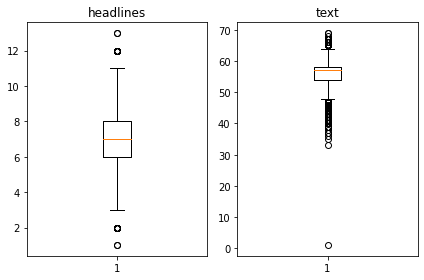

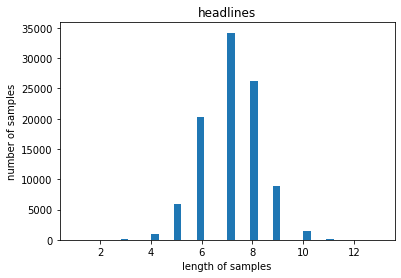

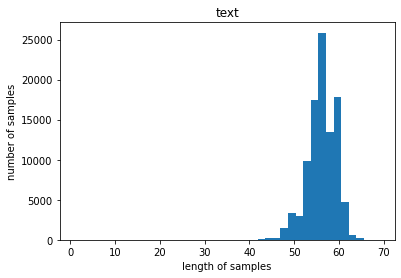

In [15]:
# 샘플의 최대 길이 분포 출력
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['text']]
headlines_len = [len(s.split()) for s in data['headlines']]

print('text의 최소 길이 : {}'.format(np.min(text_len)))
print('text의 최대 길이 : {}'.format(np.max(text_len)))
print('text의 평균 길이 : {}'.format(np.mean(text_len)))
print('headlines의 최소 길이 : {}'.format(np.min(headlines_len)))
print('headlines의 최대 길이 : {}'.format(np.max(headlines_len)))
print('headlines의 평균 길이 : {}'.format(np.mean(headlines_len)))

plt.subplot(1,2,1)
plt.boxplot(headlines_len)
plt.title('headlines')
plt.subplot(1,2,2)
plt.boxplot(text_len)
plt.title('text')
plt.tight_layout()
plt.show()

plt.title('headlines')
plt.hist(headlines_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

위에서 부터 차례대로 그래프는 각각 실제 텍스트와 요약의 길이 분포, 실제 텍스트 샘플 길이 별 갯수, 요약본 샘플 길이 별 개수를 나타내고 있습니다.

text의 경우, 최소 길이가 2, 최대 길이가 69의 차이를 보이고, 평균 길이는 56.18로 시각화된 그래프로 보았을 땐 대체적으로 50~60 내외의 길이를 가진다는 것을 확인 할 수 있었습니다.

headlines의 경우, 최소 길이가 1, 최대 길이가 13의 차이를 보이고, 평균 길이는 7로 text에 비해서 상대적으로 길이가 매우 짧으며, 시각화 된 그래프로 보았을 떄에도 대체적으로 10 이하의 길이를 가지고 있음을 확인 할 수 있었습니다.

In [16]:
# text 의 최대 길이와 summary 의 적절한 최대 길이 임의로 정하기

text_max_len = 57
headlines_max_len = 7

In [17]:
# 훈련 데이터와 샘플의 길이를 입력하면 데이터의 몇 %가 해당하는지 계산

def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))
print('=3')

=3


In [18]:
below_threshold_len(text_max_len, data['text'])
below_threshold_len(headlines_max_len,  data['headlines'])

전체 샘플 중 길이가 57 이하인 샘플의 비율: 0.6258235054900366
전체 샘플 중 길이가 7 이하인 샘플의 비율: 0.6264640097600651


위에서 시각화를 통해서 알아낸 평균 길이를 기반으로, text_max_len = 57, headlines_max_len = 7 로 지정을 하고, 그 이하의 샘플 비율을 조사해본 결과,

-> text 기준 57 이하인 샘플의 비율은 : 0.6258235054900366 이었으며, headlines 기준 7 이하인 샘플의 비율은 0.6264640097600651 이었습니다.

In [19]:
## 샘플들의 길이 중에서 max length 이하인 데이터들의 갯수를 알아보기

data = data[data['text'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['headlines'].apply(lambda x: len(x.split()) <= headlines_max_len)]
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 39924


### 2-5. 시작 토큰과 종료 토큰 추가하기

In [ ]:
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가

data['decoder_input'] = data['headlines'].apply(lambda x : 'sostoken '+ x) #시작 토큰
data['decoder_target'] = data['headlines'].apply(lambda x : x + ' eostoken') #종료 토큰
data.head()

Error: Kernel is dead